# Disciplina: Tópicos em Inteligência Computacional
Instituto Federal do Norte de Minas Gerais Campus Montes Claros <br/>
Curso: Ciência da Computação <br/>
Professora: Luciana Balieiro Cosme<br/>
**Atividade Aula 4: REGRESSÃO** <br/>

In [51]:
#1. primeira ação é explorar os dados da base de dados. Quais dados são?
import csv
#import tkinter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [52]:
tabela = pd.read_csv('bike.csv', sep=';')
tabela.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [53]:
#mostra uma quantidade maior de linhas, no caso, 10 linhas.
tabela.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [54]:
# e o preço?
#tabela['quant'] = tabela.target
#tabela.head(10)

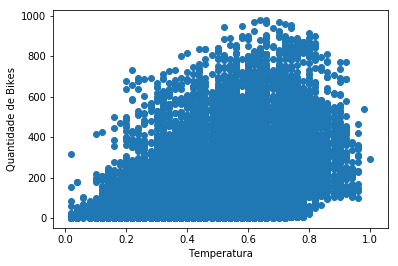

In [55]:
import matplotlib.pyplot as plt
# qual a melhor característica/columa que melhor representa o preço?

#visualmente
plt.scatter(tabela['temp'], tabela['cnt'])
plt.xlabel('Temperatura')
plt.ylabel('Quantidade de Bikes')
plt.show()

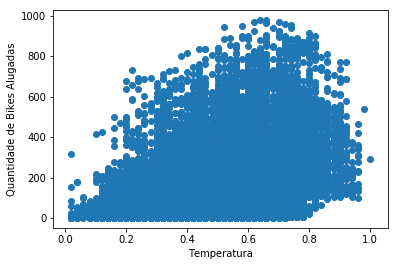

In [56]:
plt.scatter(tabela.temp, tabela.cnt)
plt.ylabel('Quantidade de Bikes Alugadas')
plt.xlabel('Temperatura')
plt.show()

In [57]:
#Métodos de correlação

tabela.corr()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


In [58]:
#resume o carregamento da base e da tabela
'''
from sklearn.datasets import load_boston
import pandas

boston = load_boston()
tabela = pandas.DataFrame(boston.data)
tabela.columns = boston.feature_names
'''

#seleciona duas colunas
X = tabela[["atemp", "temp","hr","holiday"]]

Depois de explorar a base de dados Boston, e verificar quais características podem estar relacionadas ao preço, podemos, então, tentar prever o preço com base em outras variáveis. 

Matematicamente, considere, que o relacionamento entre as variáveis Y e X é representada pela equação:  $Y = aX + B$

em que Y é a variável que pretendemos explorar, no caso do nosso exemplo, o preço, e X são as variáveis que utilizaremos para prever, no caso, a porcentagem de casas com status menor (LSTAT) e a taxa de crimes (RM).

('Coeficientes: \n', array([ 69.52005487, 276.3363768 ,   9.15184566, -19.37362234]))
('Coeficientes: \n', -86.67885687883881)
(0.5340849999999999, 16, 70.60003961832547)


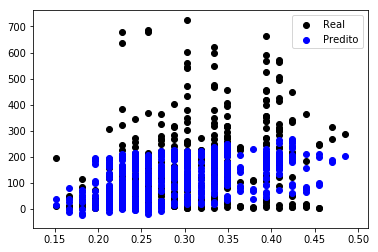

In [59]:
#separa dados de treinamento do modelo linear e dados para validação do modelo
#inclui o modulo de regressão linear
from sklearn import linear_model
import matplotlib.pyplot as plt

#separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t = X[:-500]
X_v = X[-500:]
#print(X_t["RM"])
y_t = tabela["cnt"][:-500]
y_v = tabela["cnt"][-500:]

regr = linear_model.LinearRegression()

# treina o modelo
regr.fit(X_t, y_t)

# faz a predição
y_pred = regr.predict(X_v)

# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = 5.10*RM + -0.65*LSTAT + -1.24

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste = 5.10*X_v["temp"] - 0.65*X_v["atemp"]- 1.24

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear

#print(y_teste)
print(y_teste[16879], y_t[0],y_pred[0])

#plota todos os valores de validação
plt.scatter(X_v["atemp"], y_v,  color='black')
plt.scatter(X_v["atemp"], y_pred, color='blue')
plt.legend(["Real", "Predito"])

**Atividade**: Para turma A (que não fez IA), as equipes devem fazer para a base de dados Diabetes, também do sklearn.datasets, o processo de exploração dos dados, seleção de características e predição dos valores. Para a turma B(que fez IA), as equipes devem trazer outra base de dados e fazer o processo descrito acima.

Para todas as equipes, cada membro deve ser responsável por uma etapa, e sua colaboração deve ser explicíta no github.

('Coeficientes: \n', array([375.42848822,   9.19358218, -18.21330359]))
('Coeficientes: \n', -95.40667517272755)
(-0.45359000000000016, 16, 76.56828371750811)


AttributeError: 'LinearRegression' object has no attribute 'summary'

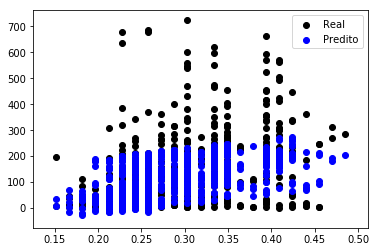

In [60]:
X1 = tabela[["atemp","hr","holiday"]]
#separa dados de treinamento do modelo linear e dados para validação do modelo
#inclui o modulo de regressão l
#separa em dois conjuntos, um para treinamento e outro para validação (20 últimos)
X_t1 = X1[:-500]
X_v1 = X1[-500:]
#print(X_t["RM"])
y_t1 = tabela["cnt"][:-500]
y_v1 = tabela["cnt"][-500:]

regr = linear_model.LinearRegression()

# treina o modelo
regr.fit(X_t1, y_t1)

# faz a predição
y_pred1 = regr.predict(X_v1)

# coeficientes a
print('Coeficientes: \n', regr.coef_)
#intercepto b
print('Coeficientes: \n', regr.intercept_)
#y = 5.10*RM + -0.65*LSTAT + -1.24

#prediz manualmente os valores com base nos coeficientes encontrados na regressao
y_teste1 = 5.10*X_v1["atemp"] - 0.65*X_v1["hr"]- 1.24

#exibe o valor predito manualmente y_teste, que começa de 486
#exibe o valor real y_t
#exibe o valor predito pela regressão linear

#print(y_teste)
print(y_teste1[16879], y_t1[0],y_pred1[0])

#plota todos os valores de validação
plt.scatter(X_v1["atemp"], y_v1,  color='black')
plt.scatter(X_v1["atemp"], y_pred1, color='blue')
plt.legend(["Real", "Predito"])

#R^2 ajustado
print(regr.summary)